<h1 align='center' style="color: blue;">Assignment #2</h1>

In [1]:
# Student Name: <put your full name here>

In [312]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,auc,roc_curve,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.neighbors import KNeighborsClassifier
import statsmodels.api as sm
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.multiclass import OneVsRestClassifier
from sklearn.cluster import KMeans


# Section 1

<p><b>Question #1</b>: 
<ol>
    <li>Download the Bank.csv dataset from the Canvas and read it.</li>
    <li>Convert Geography and Gender categorical features into dummy variables.</li>
    <li>Use min-max normalization to normalize values in CreditScore, Age, Balance, NumOfProducts, EstimatedSalary columns.</li>
    <li>Use <u>logistic regression</u> to create a prediction model
        <ul>
            <li>Use 75% of data for tarining and consider 25% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li>Use all features (including dummy variables) to create your predictive model.</li>
            <li><b>Exited</b> is your dependent variable. It shows whether or not the customer left the bank.</li>
        </ul>
    </li>
    <li>Use similar structure as above to create a <u>naive bayes</u> predictive model.</li>
    <li>Use in-sample data (train data) and out-of-sample data (test data) to check the accuracy of your naive bayes model:
        <ul>
            <li>What is the general expectation? should we expect to get higher accuray on in-sample data or out-of-sample data</li>
            <li>What is the result in your case?</li>
        </ul>
    </li>
    <li>Visualize the confusion matrix using a heatmap for both logistic regression, and naive bayes.</li>
</ol>
</p>

In [4]:
# Write your answer here (part1)
df_bank = pd.read_csv("Bank.csv")

In [5]:
# Write your answer here (part2)
df_bank = pd.get_dummies(df_bank,columns = ['Geography','Gender'])

In [7]:
# Write your answer here (part3)
scaler = MinMaxScaler()
cols_to_scale = ["CreditScore", "Age", "Balance", "NumOfProducts", "EstimatedSalary"]
for i in df_bank.columns:
    if i in cols_to_scale:
        df_bank[[i]] = scaler.fit_transform(df_bank[[i]])
    else :
        pass

<b> Dropping the surname column because it is a string and no information has been provided to handle this column.

In [33]:
df_bank.drop("Surname",axis=1,inplace=True)

In [34]:
df_bank.columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male'],
      dtype='object')

In [39]:
# Write your answer here (part4)
X = df_bank.drop("Exited",axis=1)
y = df_bank['Exited']


X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state=0)
clf_lr = LogisticRegression(random_state=0).fit(X_train,y_train)
y_pred = clf_lr.predict(X_test)


In [43]:
# Write your answer here (part5)

clf_nb = GaussianNB().fit(X_train,y_train)
y_pred_train_nb = clf_nb.predict(X_train)
y_pred_test_nb = clf_nb.predict(X_test)

In [46]:
# Write your answer here (part6)
acc_train_data = accuracy_score(y_train,y_pred_train_nb)
print(f"Accuracy on train data is {acc_train_data*100} %")

acc_test_data = accuracy_score(y_test,y_pred_test_nb)
print(f"Accuracy on test data is {acc_test_data*100} %")

Accuracy on train data is 79.62666666666667 %
Accuracy on test data is 79.64 %


Accuracy is similar on in-sample data (train data) as well as on out-of-sample data (test data)



-------------------- Confusion matrix For Naive Bayes --------------------




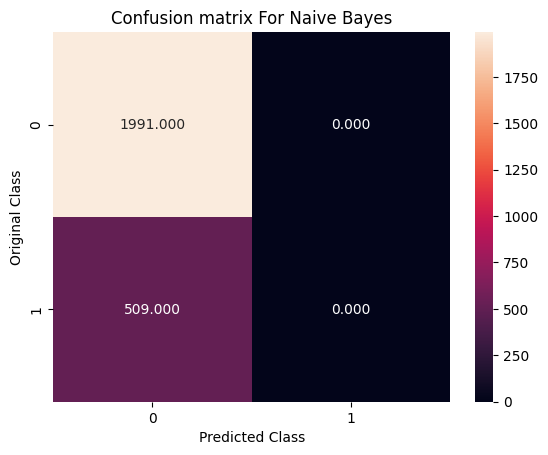



-------------------- Confusion matrix For Logistic regression --------------------




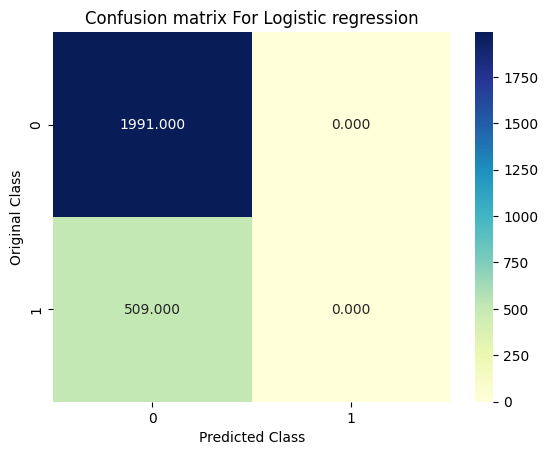

In [55]:
# Write your answer here (part7)

C = confusion_matrix(y_test, y_pred_test_nb)

print('\n')
print("-"*20, "Confusion matrix For Naive Bayes", "-"*20)
print('\n')
# plt.figure(figsize=(20,7))
sns.heatmap(C, annot=True, fmt=".3f", xticklabels=clf_nb.classes_, yticklabels=clf_nb.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix For Naive Bayes")
plt.show()

C = confusion_matrix(y_test, y_pred)

print('\n')
print("-"*20, "Confusion matrix For Logistic regression", "-"*20)
print('\n')
# plt.figure(figsize=(20,7))
sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=clf_lr.classes_, yticklabels=clf_lr.classes_)
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix For Logistic regression")
plt.show()

# Section 2

<p><b>Question #2</b>
    <ol>
        <li>Download the winequality-red.csv dataset from the Canvas and read it.</li>
        <li>Use <u>Random Forest</u> to create a prediction model:</li>
        <ul>
            <li>Use grid search to find the optimal number of trees and maximum depth (try values between 10-100 and 3-10 respectively)</li>
            <li>Use 5-fold stratified cross validation in your work.</li> 
            <li>The dependent variable is the <b>quality</b> of the wine (scored from 0 to 10). </li>
            <li>Use all other features as independent variables</li>
        </ul>
        <li>Perform Additional Data Aanalysis:</li>
        <ul>
            <li>Use full dataset to create another predictive model using Random Forest(use the best parameters that you found in the previous step)</li>
            <li>What is the in-sample prediction accuracy?</li>
            <li>Find the feature importance.How you can interpret it</li>
        </ul>
        <li>Create two predction models using upport Vector Machine (SVM), and K-Nearest Neighbors (KNN):</li>
        <ul>
            <li>Use 75% of data for tarining and consider 25% of data for testing. (Use <b style="color:red">random_state=0</b>)</li>
            <li> Report the out-sample accuracy for all models</li>
        </ul>
        <li>Compute Precision, Recall, F1 and AUC values for the prediction models in the last step. Which one has the best performance. (Write your logit for selection of the best model)</li>
        <li>Draw ROC Curve for SVM model</li>
    </ol>
            

In [257]:
# Write your answer here (part1)
df_wine = pd.read_csv("winequality-red.csv")

In [258]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [259]:
X = df_wine.drop("quality",axis=1)
y = df_wine['quality']

In [260]:
sc = StandardScaler()
for i in X.columns:
    X[[i]] = sc.fit_transform(X[[i]])

In [261]:
# Write your answer here (part2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)
hyperparameters = {
    "n_estimators" : [10,20,30,40,50,60,70,80,90,100],
    "max_depth" : [3,4,5,6,7,8,9,10]
}

clf_rfc = GridSearchCV(RandomForestClassifier(),param_grid=hyperparameters,cv=5,n_jobs=-1)
clf_rfc.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]})

In [237]:
clf_rfc.best_params_

{'max_depth': 10, 'n_estimators': 90}

In [238]:
# Write your answer here (part3)
rfc_best = RandomForestClassifier(max_depth=int(clf_rfc.best_params_['max_depth']),
                                  n_estimators=int(clf_rfc.best_params_['n_estimators']))
rfc_best.fit(X,y)

RandomForestClassifier(max_depth=10, n_estimators=90)

In [239]:
y_pred_rfc_best = rfc_best.predict(X)

In [240]:
accuracy_rfc_best = np.round(accuracy_score(y_pred_rfc_best,y),2)
print(f"Accuracy of Random Forest Classifier with best parameters on full dataset is {accuracy_rfc_best*100} %")

Accuracy of Random Forest Classifier with best parameters on full dataset is 94.0 %


In [241]:

rfc_best.feature_importances_

array([0.07051918, 0.10689833, 0.06684668, 0.06669822, 0.07306178,
       0.06100519, 0.10283769, 0.0871671 , 0.07031771, 0.11755427,
       0.17709386])

In [242]:
rfc_best.feature_names_in_

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol'],
      dtype=object)

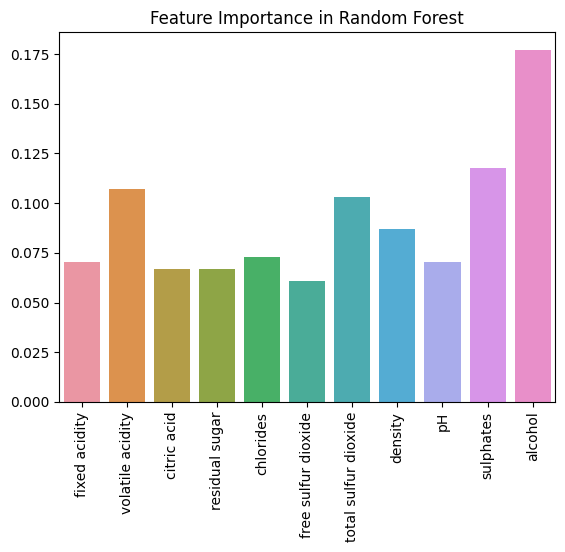

In [243]:
sns.barplot(x=list(rfc_best.feature_names_in_),y=list(rfc_best.feature_importances_))
plt.title("Feature Importance in Random Forest")
plt.xticks(rotation=90)
plt.show()

In [244]:
# Write your answer here (part4)
## SVM
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train,y_train)

## KNN
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train,y_train)

y_pred_clf_svm = clf_svm.predict(X_test)
y_pred_clf_knn = clf_knn.predict(X_test)

In [245]:
acc_clf_svm = np.round(accuracy_score(y_pred_clf_svm,y_test),2)
acc_clf_knn = np.round(accuracy_score(y_pred_clf_knn,y_test),2)
print(f"Accuracy in SVM model for out sample data is {acc_clf_svm*100} %")
print(f"Accuracy in knn model for out sample data is {acc_clf_knn*100} %")

Accuracy in SVM model for out sample data is 63.0 %
Accuracy in knn model for out sample data is 56.99999999999999 %


In [246]:
# Write your answer here (part5)
C_svm = confusion_matrix(y_test,y_pred_clf_svm)
C_knn = confusion_matrix(y_test,y_pred_clf_knn)
rec_clf_svm = np.diag(C_svm) / np.sum(C_svm, axis = 1)
rec_clf_knn = np.diag(C_knn) / np.sum(C_knn, axis = 1)
print(f"Recall in SVM model for out sample data is {np.mean(rec_clf_svm)}")
print(f"Recall in knn model for out sample data is {np.mean(rec_clf_knn)}")

Recall in SVM model for out sample data is 0.2923802065204781
Recall in knn model for out sample data is 0.2803529991878408


In [247]:
prec_clf_svm = precision_score(y_test,y_pred_clf_svm,average='micro')
prec_clf_knn = precision_score(y_test,y_pred_clf_knn,average='micro')

In [248]:
# prec_clf_svm = np.diag(C_svm) / np.sum(C_svm, axis = 0)
# prec_clf_knn = np.diag(C_knn) / np.sum(C_knn, axis = 0)
print(f"Precision in SVM model for out sample data is {prec_clf_svm}")
print(f"Precision in knn model for out sample data is {prec_clf_knn}")

Precision in SVM model for out sample data is 0.63
Precision in knn model for out sample data is 0.575


In [249]:
f1_score_svm = (2*(prec_clf_svm*np.mean(rec_clf_svm)))/(prec_clf_svm*np.mean(rec_clf_svm))
f1_score_knn = (2*(prec_clf_knn*np.mean(rec_clf_knn)))/(prec_clf_knn*np.mean(rec_clf_knn))
print(f"F1 Score in SVM model for out sample data is {f1_score_svm}")
print(f"F1 Score in knn model for out sample data is {f1_score_knn}")

F1 Score in SVM model for out sample data is 2.0
F1 Score in knn model for out sample data is 2.0


In [285]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
labels = clf_knn.classes_.tolist()
# Binarize ytest with shape (n_samples, n_classes)
ytest = label_binarize(y_test, classes=labels)
# Binarize ypreds with shape (n_samples, n_classes)
y_pred_clf_svm = label_binarize(y_pred_clf_svm, classes=labels)
auc_svm = roc_auc_score(y_test, y_pred_clf_svm, average='macro',multi_class='ovo')
 # using one-vs-one strategy
y_pred_clf_knn = label_binarize(y_pred_clf_knn, classes=labels)
auc_knn = roc_auc_score(y_test, y_pred_clf_knn, average='macro',multi_class='ovo') 

print("AUC Score for SVM : ", auc_svm)
print("AUC Score for KNN: ", auc_knn)

AUC Score for SVM :  0.5754281239122868
AUC Score for KNN:  0.5682117995127045


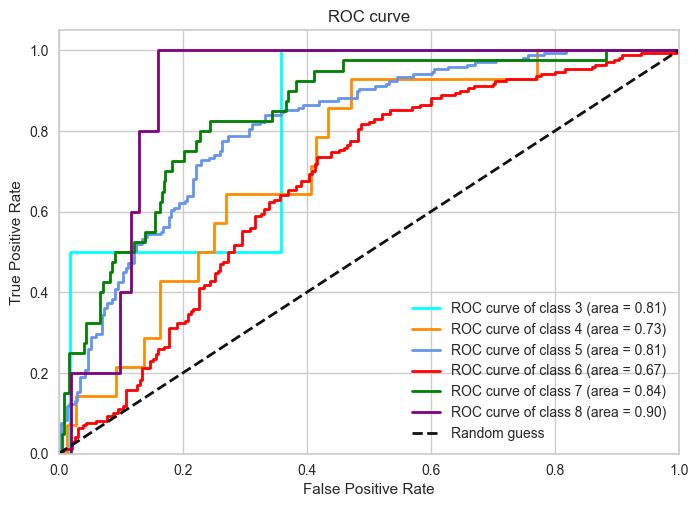

In [308]:
# Write your answer here (part6)
y_train = label_binarize(y_train,classes=[3, 4, 5, 6, 7, 8])
y_test = label_binarize(y_test,classes=[3, 4, 5, 6, 7, 8])
clf = OneVsRestClassifier(LinearSVC(random_state=0))
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(6):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple']
for i, color in zip(range(6), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(clf_knn.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2,label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()


# Section 3

<p><b>Question #3</b>
    <ol>
        <li>Download the Real_estate.csv dataset from the Canvas and read it.</li>
        <li>Perform explonatory linear regression using statsmodels package and create visualizations to analyze the relationships between all variables.</li>
        <ul>
        <li><b>Price of unit area</b> is your target variable.</li>
            <li>Which factors are significant at .05 level in your model?</li>
            <li>What is the $R^2$ for your model? What does $R^2$ mean in this analysis?</li>
        </ul>
            <li>Use linear regression to create a predictive model.</li>
        <ul>
             <li><b>Price of unit area</b> is your target variable.</li>
            <li>Use 70% of data for training and consider 30% of data for testing. (Use random_state=0)</li>
            <li>Use all features to create you predictive model.</li>
             <li> Compute $R^2$ for both in-sample(train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li> 
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li></ul>
<li>Perform principal component analysis (PCA) to reduce the dimensions of the dataset.</li>
        <ul>
        <li>Retain the top two principal components. Plot the data points in a two-dimensional plot based on the two principal components.</li>
            <li>Use 70% of data for training and consider 30% of data for testing. (Use random_state=0)</li>
            <li>Use the top two principal components as features to create your predictive model.</li>
             <li><b>Price of unit area</b> is your target variable.</li>
    <li> Compute MSE for both in-sample (train data) and out-of-sample (test data) data. Which one is higher? What was your expectation?</li></ul>
            

In [150]:
# Write your answer here (part1)
df_real_estate = pd.read_csv("Real estate.csv")


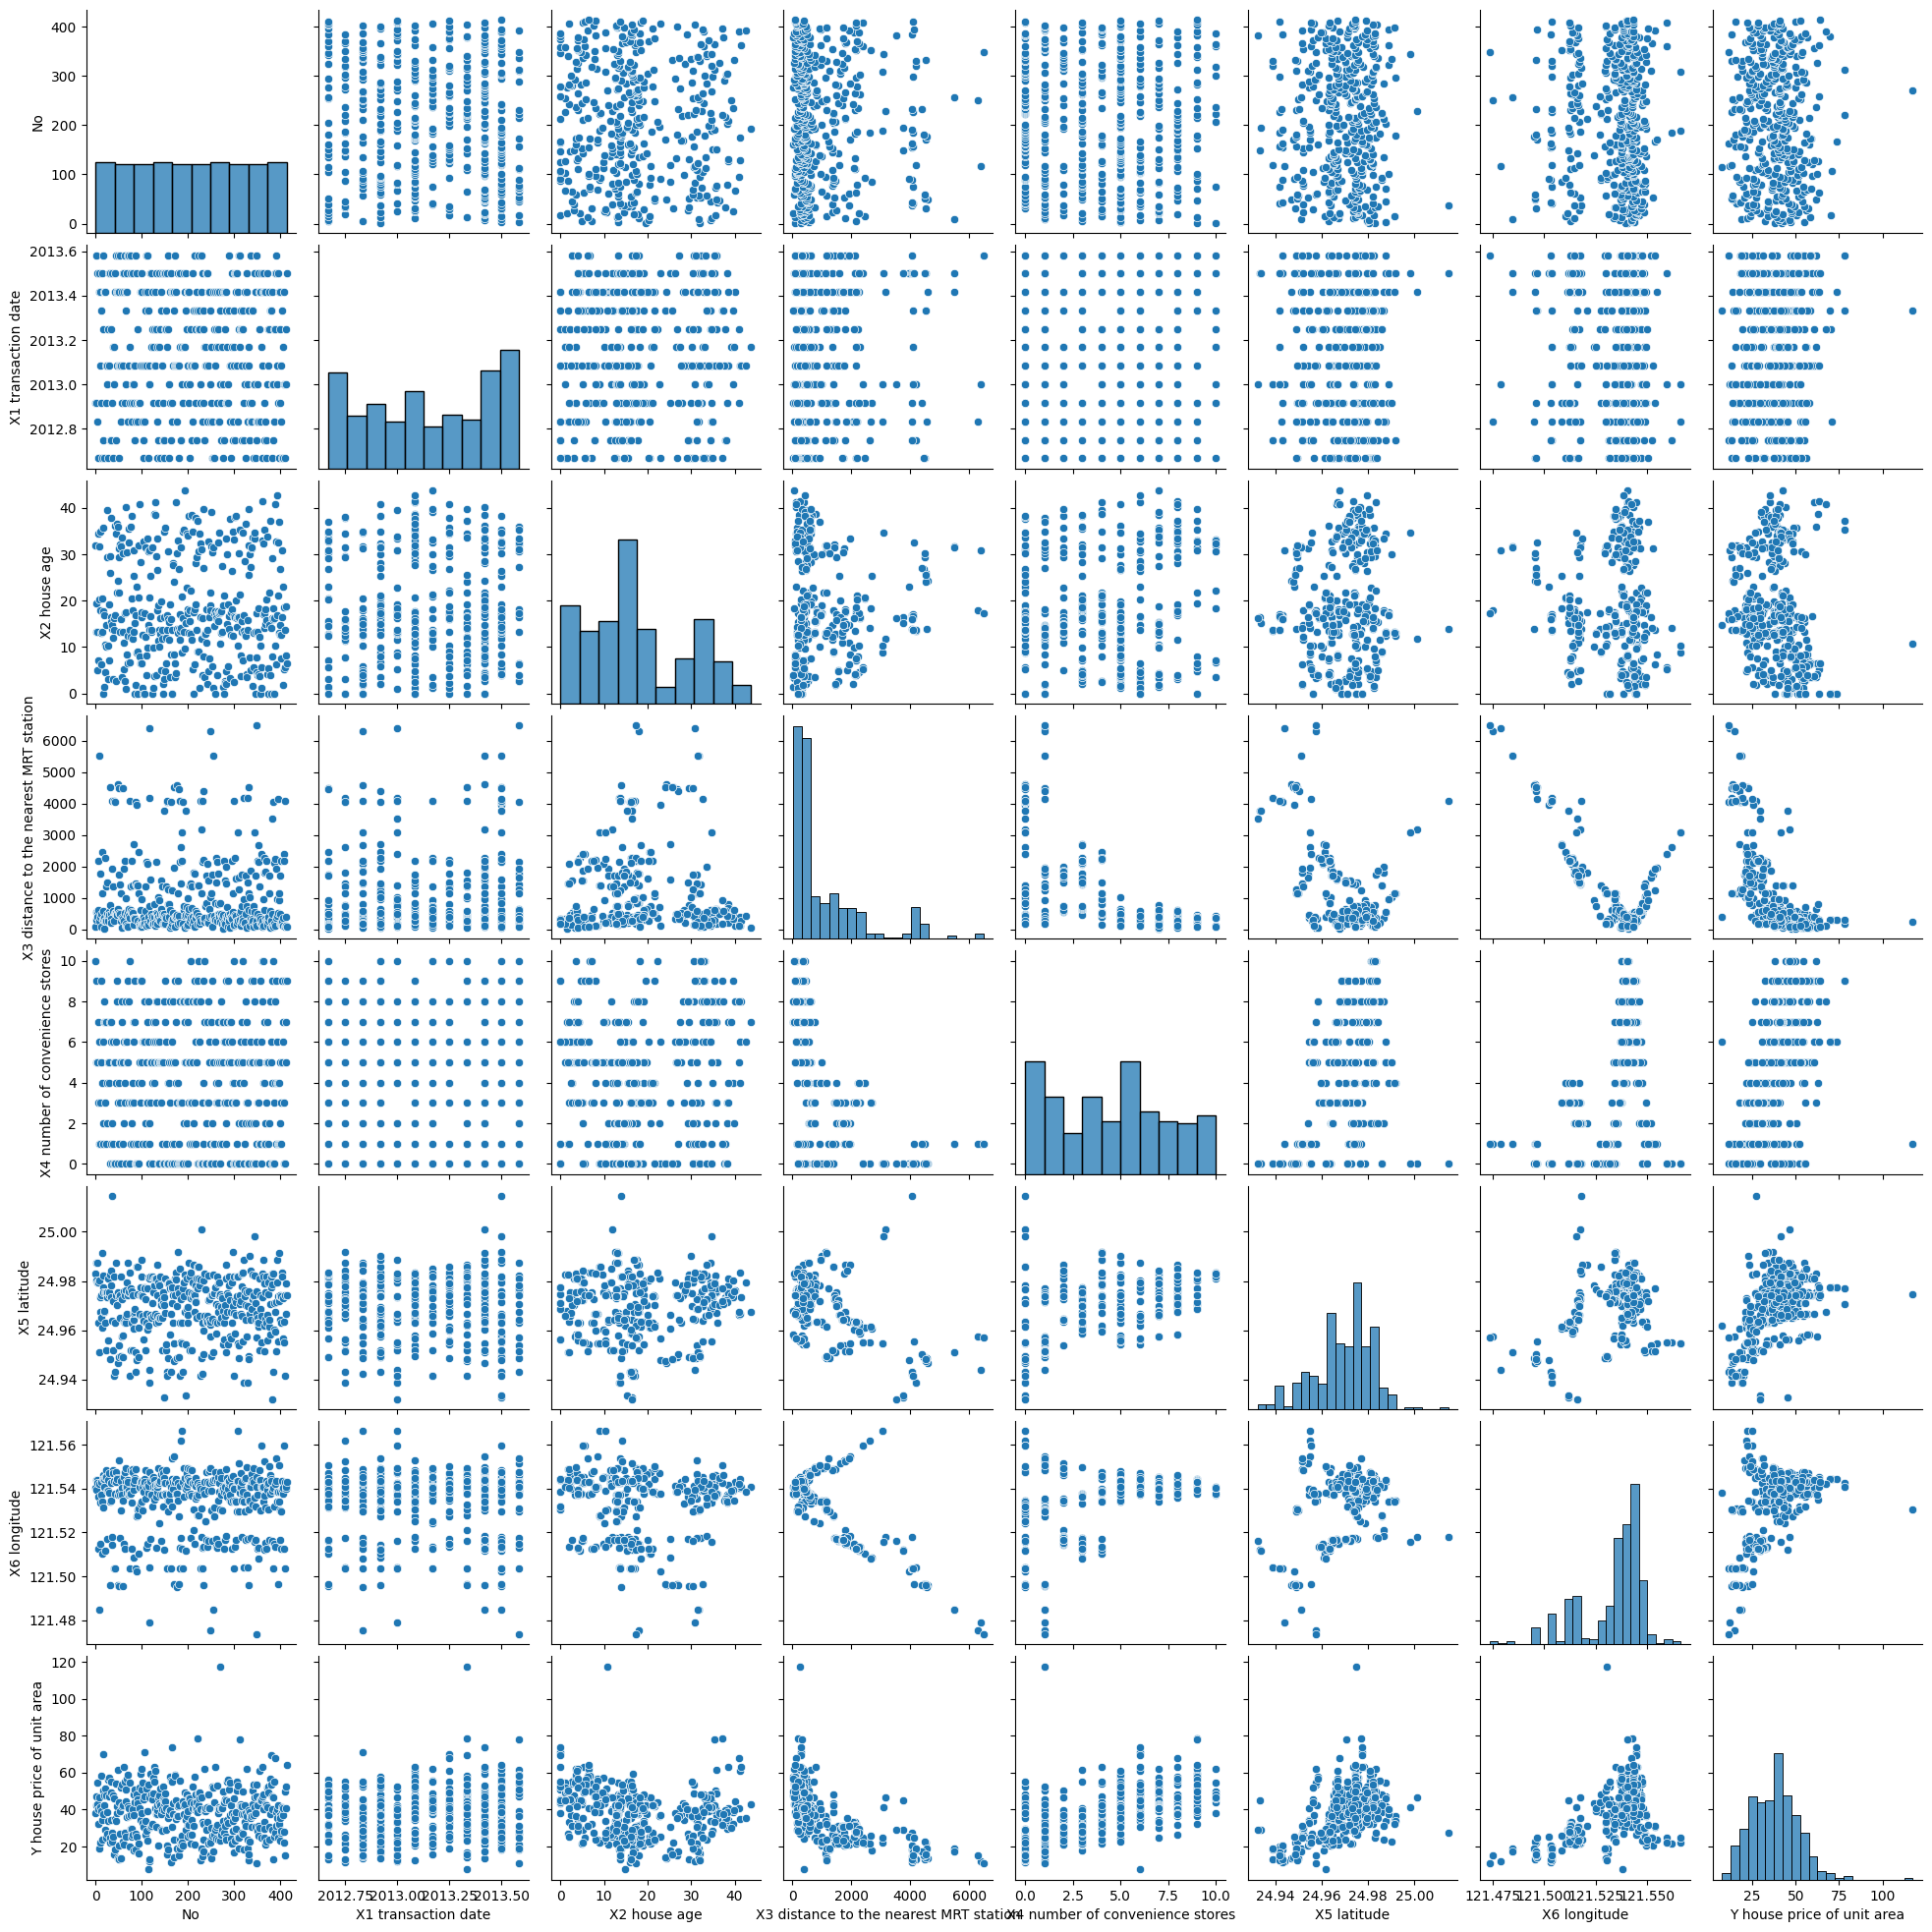

In [152]:
# create pairplot to visualize pairwise relationships between variables
sns.pairplot(df_real_estate)
plt.show()

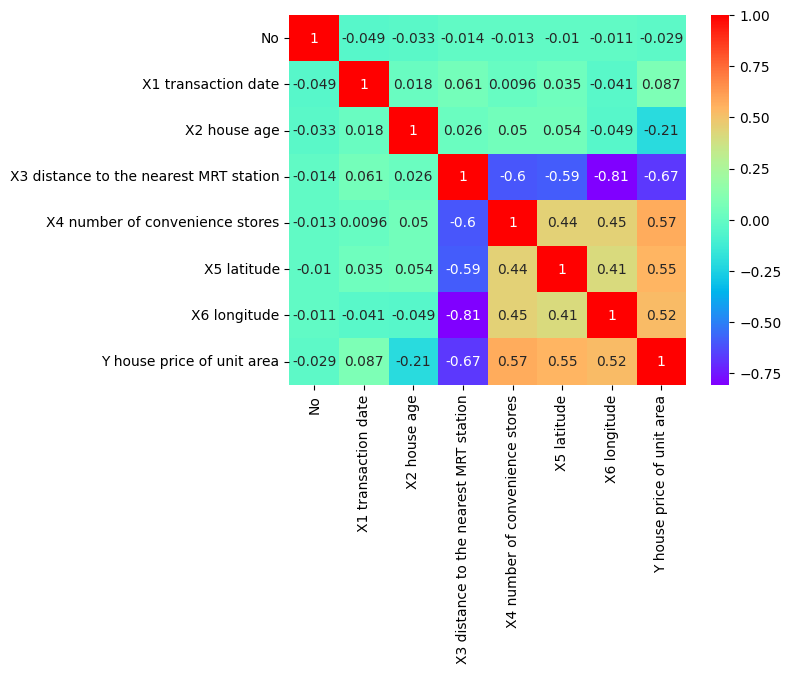

In [155]:
# create heatmap to visualize correlation between variables
sns.heatmap(df_real_estate.corr(), annot=True, cmap='rainbow')
plt.show()

In [157]:
# perform exploratory linear regression
X = df_real_estate.drop("Y house price of unit area",axis=1)
y = df_real_estate['Y house price of unit area']
X = sm.add_constant(X)  # add constant term for intercept
model = sm.OLS(y, X).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     Y house price of unit area   R-squared:                       0.583
Model:                                    OLS   Adj. R-squared:                  0.576
Method:                         Least Squares   F-statistic:                     81.21
Date:                        Mon, 03 Apr 2023   Prob (F-statistic):           3.06e-73
Time:                                18:08:07   Log-Likelihood:                -1486.5
No. Observations:                         414   AIC:                             2989.
Df Residuals:                             406   BIC:                             3021.
Df Model:                                   7                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------


As observed X6 longitude  and No have significant p values




The value for R^2 is 0.583 and R-squared tells us how well the independent variable(s) explain the variation in the dependent variable. It is a number between 0 and 1, where a value of 1 indicates that all of the variation in the dependent variable is explained by the independent variable(s), and a value of 0 indicates that none of the variation in the dependent variable is explained by the independent variable(s).For example, if the R-squared value of a linear regression model is 0.8, it means that 80% of the variation in the dependent variable can be explained by the independent variable(s) included in the model. In other words, the model fits the data well and is able to explain most of the variability in the dependent variable.

In [160]:
# Write your answer here (part2)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
lr_reg = LinearRegression()
lr_reg.fit(X_train,y_train)
y_pred_lrreg_tr = lr_reg.predict(X_train)
y_pred_lrreg_te = lr_reg.predict(X_test)

In [161]:

r2_score_train = r2_score(y_train,y_pred_lrreg_tr)
r2_score_test = r2_score(y_test,y_pred_lrreg_te)
print(f"R squared error for train data is {r2_score_train}")
print(f"R squared error for test data is {r2_score_test}")

R squared error for train data is 0.5840755815068961
R squared error for test data is 0.5710302953097026


The R squared error in both train and test sample is almost same higher in train data that means the distribution of them is similar which is a good thing for training although our r2 score should be close to 1 

In [163]:

mse_score_train = mean_squared_error(y_train,y_pred_lrreg_tr)
mse_score_test = mean_squared_error(y_test,y_pred_lrreg_te)
print(f"Mean squared error for train data is {mse_score_train}")
print(f"Mean squared error for test data is {mse_score_test}")

Mean squared error for train data is 79.21138230258202
Mean squared error for test data is 73.1068290413531


The Mean squared error in both train and test sample is almost similar but higher in train data that means the distribution of them is similar

Explained variance ratio: [0.9910101 0.0089058]


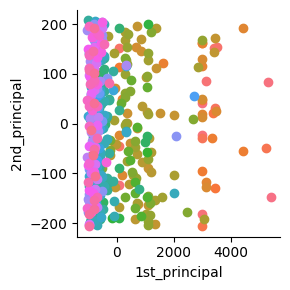

In [182]:
# Write your answer here (part3)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

# Print the explained variance ratio of each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

# attaching the label for each 2-d data point 
pca_data = np.vstack((X_pca.T, df_real_estate['Y house price of unit area'])).T

# creating a new data fram which help us in ploting the result data
## Retain the top two principal components. Plot the data points in a two-dimensional plot based on the two principal components.
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sns.FacetGrid(pca_df, hue="label").map(plt.scatter, '1st_principal', '2nd_principal')
plt.show()

In [184]:
# Use 70% of data for training and consider 30% of data for testing. (Use random_state=0)
X = pca_df.drop('label',axis=1)
y = pca_df['label']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=0)

In [185]:
# Use the top two principal components as features to create your predictive model
lr_reg_pca = LinearRegression()
lr_reg_pca.fit(X_train,y_train)

LinearRegression()

In [187]:
y_pred_lrreg_pca_tr = lr_reg_pca.predict(X_train)
y_pred_lrreg_pca_te = lr_reg_pca.predict(X_test)

In [188]:

mse_score_train_pca = mean_squared_error(y_train,y_pred_lrreg_pca_tr)
mse_score_test_pca = mean_squared_error(y_test,y_pred_lrreg_pca_te)
print(f"Mean squared error for train data after PCA is {mse_score_train_pca}")
print(f"Mean squared error for test data after PCA is {mse_score_test_pca}")

Mean squared error for train data after PCA is 102.5930218010229
Mean squared error for test data after PCA is 98.42972736774028


The error is high on train data. On reducing the features our error increases.

# Section 4

<p><b>Question #4</b>: The following code download images of top 200 players (<u>Download Fifa Data from Canvas</u>)

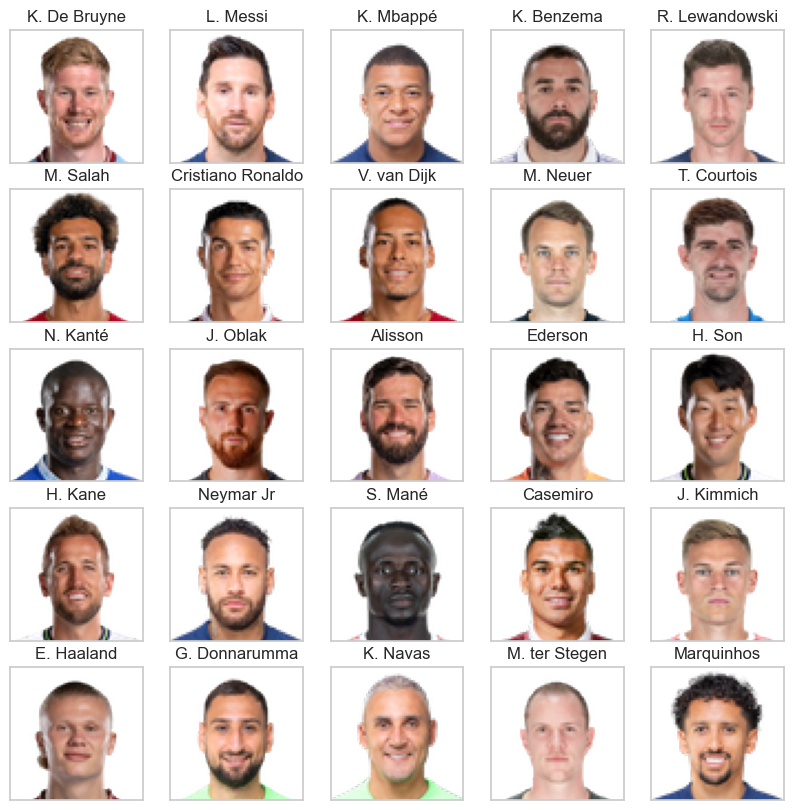

In [309]:
from PIL import Image
import requests
from io import BytesIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def read_image(url):
    response = requests.get(url)
    img = np.array(Image.open(BytesIO(response.content)).convert('RGBA'))
    return img

FIFA23 = pd.read_csv("Fifa23/data.csv")
TOP_300_Players = FIFA23.sort_values(by = ['Overall'], ascending=False)[:300].reset_index()

fig, ax = plt.subplots(5, 5, figsize=(10, 10))
for i, axi in enumerate(ax.flat):
    url = TOP_300_Players.loc[i,'Photo']
    img = read_image(url)
    axi.imshow(img)
    axi.set_title(TOP_300_Players.loc[i,'Name'])
    axi.set(xticks=[], yticks=[])

In [310]:
images =np.array([read_image(url) for url in TOP_300_Players.Photo])
player_names = np.array([Name for Name in TOP_300_Players.Name])
data = np.array([image.reshape(60*60*4) for image in images])

Here is some description about data
<ul>
    <li>images: contains 300 images of players. images.shape = (300, 60, 60, 4)</li> 
    <li>player_names: contains 300 names of players. player_names.shape = (300,)</li>
    <li>data: contains flatten version of images. data.shape = (300, 14400)</li>
</ul>

You need to cluster the images using K-Means algorithm
<ol>
    <li>Use PCA method to reduce the number of dimensions to 300.</li>
    <li>Find the best number of clusters using elbow method.</li>
    <li>Find the best number of clusters using silhouette method.</li>
    <li>Cluster images using an optimal number of clusters</li>
    <li>Visualize the center of clusters (<b>Tip</b>: to perform this part for each cluster, find the average of all the pixels of the images in the cluster.)</li>
    <li>Show sample of images in each cluster</li>
    <li>How can you interpret the result of clustering</li>
</ol>

In [326]:
k_values = range(1,15)

ssd = []

for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)

In [353]:
# Write your answer here (part1)
pca = PCA(n_components = 300)
pca.fit(data)
img_reduced_data = pca.transform(data)

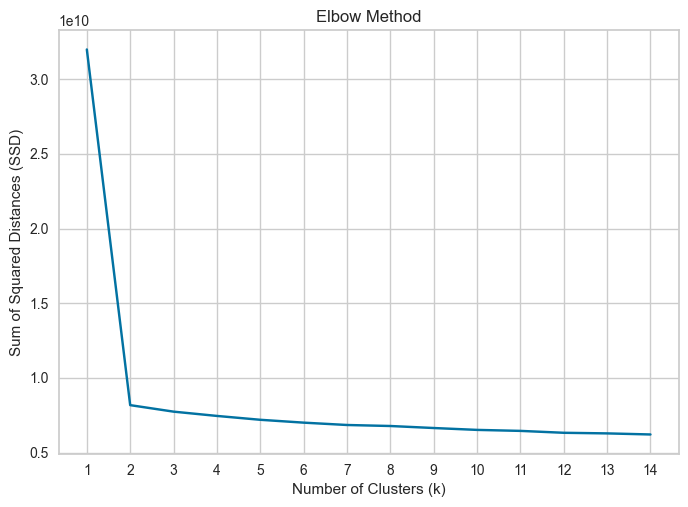

In [328]:
# Write your answer here (part2)
plt.plot(k_values,ssd,)  
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSD)')
plt.xticks(k_values)
plt.title('Elbow Method')
plt.show()

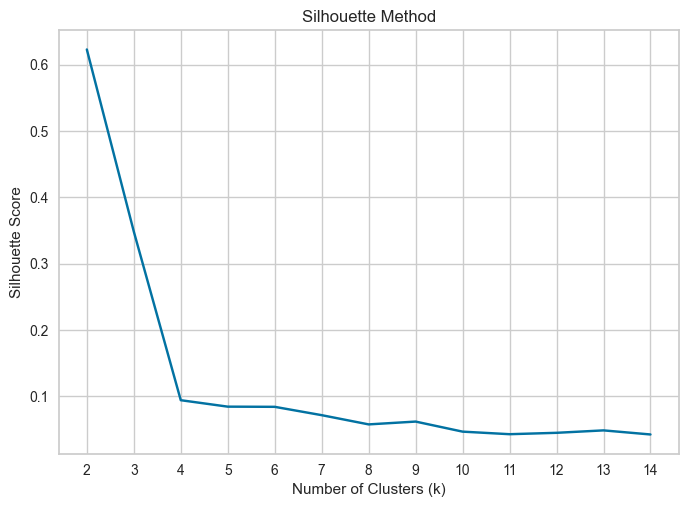

In [329]:
# Write your answer here (part3)
from sklearn.metrics import silhouette_score
k_values = range(2,15)
sil_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(data)
    labels = kmeans.labels_
    score = silhouette_score(data,labels)
    sil_scores.append(score)

# Plotting
plt.plot(k_values, sil_scores, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.xticks(k_values)
plt.show()

In [331]:
# Write your answer here (part4)
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(data)
labels = kmeans.labels_

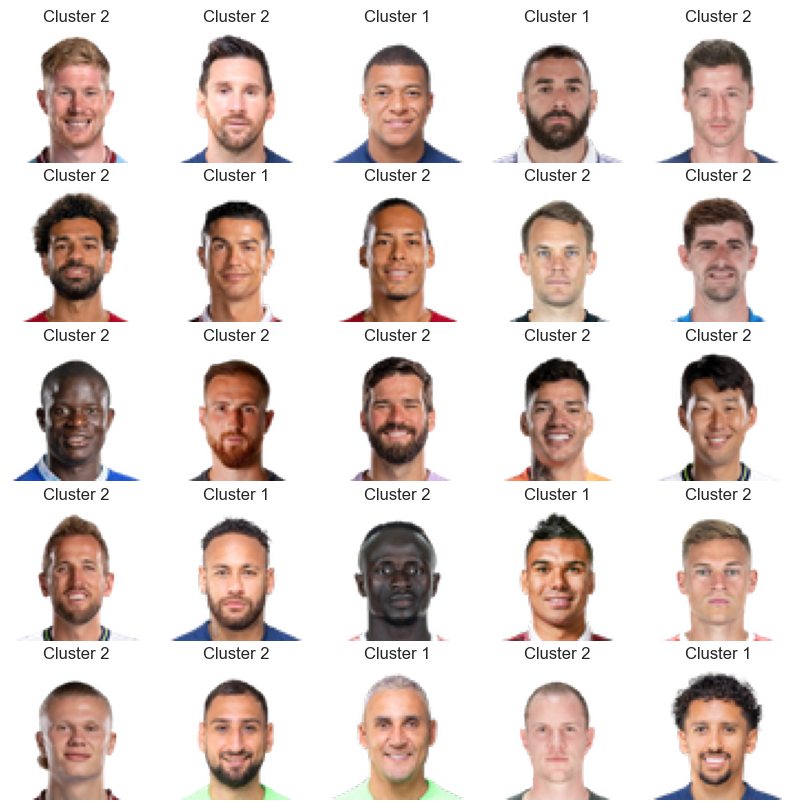

In [334]:
# Plotting
fig,ax = plt.subplots(5,5,figsize=(10,10))
for i in range(5):
    for j in range(5):
        index = i*5 +j
        ax[i,j].imshow(images[index])
        if labels[index] == 0:
            ax[i, j].set_title('Cluster 1')
        else:
            ax[i, j].set_title('Cluster 2')
        ax[i, j].axis('off')

plt.show()

In [346]:
labels

array([1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


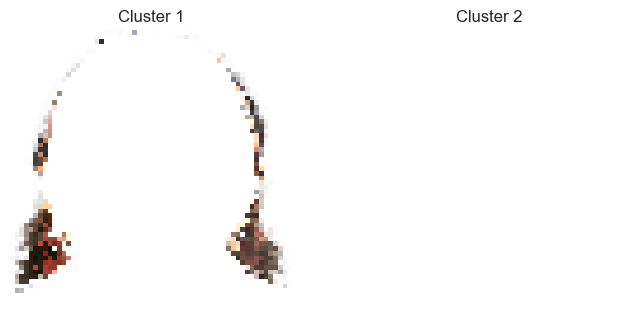

In [345]:
# Write your answer here (part5)
centers = kmeans.cluster_centers_
c1_idx = []
c2_idx = []
for i in range(len(labels)):
    if labels[i] == 0:
        c1_idx.append(i)
    else:
        c2_idx.append(i)

# Access the images belonging to each cluster
c1_images = images[c1_idx]
c2_images = images[c2_idx]

# Average of all the pixels in the image
c1_center = np.mean(c1_images,axis=0)
c2_center = np.mean(c2_images,axis=0)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(c1_center)
ax[0].axis('off')
ax[0].set_title('Cluster 1')
ax[1].imshow(c2_center)
ax[1].axis('off')
ax[1].set_title('Cluster 2')
plt.show()

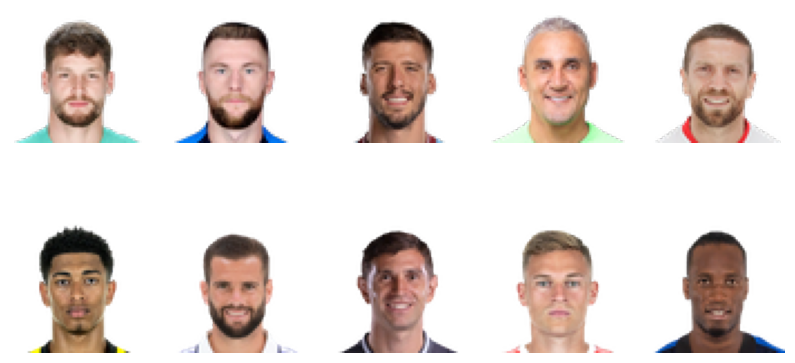

In [351]:
# Write your answer here (part6)
# Access 5 random images from each cluster
c1_sample = np.random.choice(c1_idx,5,replace=False)
c2_sample = np.random.choice(c2_idx,5,replace=False)

c1_images = images[c1_sample]
c2_images = images[c2_sample]

# Plotting the sample images 
fig,ax = plt.subplots(2,5,figsize=(10,5))
for i in range(5):
    ax[0,i].imshow(c1_images[i])
    ax[0,i].axis('off')
    ax[1,i].imshow(c2_images[i])
    ax[1,i].axis('off')
ax[0, 0].set_ylabel('Cluster 1')
ax[1, 0].set_ylabel('Cluster 2')
plt.show()

In [ ]:
# Write your answer here (part7)
"""After clustering the player images we have identified two group of players that share similar visual features or there \
    appearances are similar.Like Cluster 1 contains players with lighter skin tone and Cluster 2 contains players with dark \ 
    skin tone"""

# Section 5

<p><b>Question #5</b>:
<ol>
    <li>Download the telecom_churn dataset and read it.</li>
    <li>Convert categorical features into dummy variables.
        <ul>
            <li>If it is necassary, delete the original categorical features columns after the generation dummy variables. </li>
        </ul>
    </li>
    <li>Use mean normalization ($\frac{X-\mu}{\sigma}$) to normalize values in <b>total day minutes</b>, <b>total eve minutes</b>, <b>total night minutes</b> and <b>total intl minutes</b> columns.</li>
    <li>Use KNN to create three predictive models  (1. with 5 neighbors, 2. with 7 neighbors, 3. with 10 neighbors).
    <ul>
        <li>Use 80% of data for training and consider 20% of data for testing.(Use <b style="color:red">random_state=0</b>)</li>
        <li>Use the <b style='color:red'>stratify</b> attribute in your split.</li> 
        <li>Use all the features (including dummy variables) to create you predictive model.</li>
        <li><b>"churn"</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Find the accuracy of your models using out-of-sample data (test data). Which model has the highest accuracy? </li>
    <li>Use KNN with 4 neighbors to create a new predictive model.
    <ul>
        <li>Use whole dataset for training.</li>
        <li>Use <b>"total day minutes"</b> and <b>"total eve minutes"</b> features as your independent variables.</li>
        <li><b>"churn"</b> is your dependent variable.</li> 
    </ul>
    </li>
    <li>Visualize the decision boundary of your model.</li>
</ol>

</p> 

In [202]:
# Write your answer here (part1)
df_telecom = pd.read_csv("telecom_churn.csv")

In [203]:
# Write your answer here (part2)
df_telecom.select_dtypes(include=["object"]).nunique()

State                 51
International plan     2
Voice mail plan        2
dtype: int64

In [204]:
df_telecom = pd.get_dummies(df_telecom,columns = ['State','International plan','Voice mail plan'])

In [207]:
# Write your answer here (part3)
sc = StandardScaler()
for i in df_telecom.columns:
    if i in ['Total day minutes','Total eve minutes','Total night minutes','Total intl minutes']:
        df_telecom[[i]] = sc.fit_transform(df_telecom[[i]])
    else :
        pass

In [231]:
# Write your answer here (part4)
X = df_telecom.drop("Churn",axis=1)
y = df_telecom['Churn']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train,y_train)
knn_7= KNeighborsClassifier(n_neighbors=7)
knn_7.fit(X_train,y_train)
knn_10 = KNeighborsClassifier(n_neighbors=10)
knn_10.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [210]:
# Write your answer here (part5)
y_pred_knn_5 = knn_5.predict(X_test)
y_pred_knn_5_acc = accuracy_score(y_test,y_pred_knn_5)

y_pred_knn_7 = knn_7.predict(X_test)
y_pred_knn_7_acc = accuracy_score(y_test,y_pred_knn_7)

y_pred_knn_10 = knn_10.predict(X_test)
y_pred_knn_10_acc = accuracy_score(y_test,y_pred_knn_10)

print(f"Knn model on out-sample data with 5 neighbors has {y_pred_knn_5_acc*100} % accuracy")
print(f"Knn model on out-sample data with 7 neighbors has {y_pred_knn_7_acc*100} % accuracy")
print(f"Knn model on out-sample data with 10 neighbors has {y_pred_knn_10_acc*100} % accuracy")

Knn model on out-sample data with 5 neighbors has 84.55772113943029 % accuracy
Knn model on out-sample data with 7 neighbors has 85.45727136431785 % accuracy
Knn model on out-sample data with 10 neighbors has 85.6071964017991 % accuracy


All models are quite similar but 10 neighbors knn has the highest accuracy.

In [214]:
# Write your answer here (part6)
X = X.filter(['Total day minutes','Total eve minutes'])
knn_4 = KNeighborsClassifier(n_neighbors=4)
knn_4.fit(X,y)


KNeighborsClassifier(n_neighbors=4)

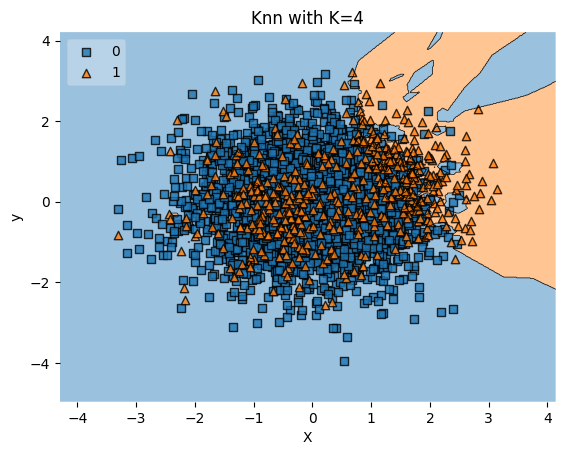

In [229]:
# Write your answer here (part7)
X = X[['Total day minutes','Total eve minutes']].values
y = df_telecom['Churn'].astype(int).values
plot_decision_regions(X, y, clf=knn_4, legend=2)
# Adding axes annotations
plt.xlabel("X")
plt.ylabel("y")
plt.title("Knn with K=4")
plt.show()

<p><b>Output</b>: 
    <ul>
        <li>You need to provide answers in the designated cell for each question (don't delete the existing comments in the cells).</li>
        <li>You need to make sure that your final file contains both codes and results (don't clear the outputs).</li>
        <li>Save your file in the .ipynb format (as it is right now).</li>
        <li>Upload your file into Canvas (Assignment #2)</li>
        <li>I will not accept any submission by email or any other method, so make sure that you submit the file in a right place at a right time.</li>
        </ul>
        </p> 